In [30]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import tensorflow as tf
%matplotlib inline

from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

In [31]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AAPL','MSFT','AMZN','FB','GOOGL','GOOG','TSLA','JPM','JNJ']

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

In [32]:
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df['date'] = pd.to_datetime(df.date).dt.date
df

,ticker,date,time,title
0,AAPL,2021-05-17,05:32PM,Apple v. Epic: Phil Schiller says App Stores 3...
1,AAPL,2021-05-17,04:18PM,Apple Music Beats Spotify To Market With High-...
2,AAPL,2021-05-17,03:03PM,Is Peloton Stock A Buy? Revenue Accelerates Bu...
3,AAPL,2021-05-17,02:44PM,U.S. to Send 80 Million Covid-19 Vaccine Doses...
4,AAPL,2021-05-17,02:40PM,Apple Begins App Store Defense in Epic Antitru...
5,AAPL,2021-05-17,02:39PM,Market volatility to continue through the summ...
6,AAPL,2021-05-17,02:37PM,Apple's App Store chief kicks off iPhone maker...
7,AAPL,2021-05-17,02:32PM,Apple's App Store chief kicks off iPhone maker...
8,AAPL,2021-05-17,01:29PM,Inflation has been the friend of stocks: Strat...
9,AAPL,2021-05-17,12:48PM,4 Dow Jones Stocks To Buy And Watch In May 202...


In [33]:
nltk.download('vader_lexicon')

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['compound']

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ryanc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0      0.1779
1      0.0000
2     -0.4588
3      0.0000
4     -0.2732
5      0.4215
6      0.1280
7      0.1280
8      0.4939
9      0.0000
10     0.0000
11     0.0000
12     0.5267
13     0.0000
14     0.1779
15     0.3818
16     0.1779
17     0.0000
18     0.0772
19     0.8720
20     0.8316
21     0.0000
22     0.0000
23     0.5413
24     0.2023
25     0.6369
26     0.0000
27     0.0000
28     0.0000
29     0.7650
        ...  
870    0.0000
871    0.0000
872    0.0000
873    0.0000
874    0.3612
875   -0.0516
876    0.1102
877    0.0000
878    0.0000
879    0.3400
880    0.0000
881    0.2023
882    0.0000
883    0.0000
884    0.0000
885    0.0000
886    0.0000
887    0.0000
888    0.0000
889    0.0000
890    0.5859
891    0.0000
892    0.0772
893   -0.2263
894    0.0000
895    0.0000
896    0.0258
897    0.0000
898    0.0000
899   -0.3400
Name: compound, Length: 900, dtype: float64

In [34]:
plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
#mean_df = df.groupby(['ticker', 'date']).mean().unstack().dropna(axis='columns', thresh=7)
mean_df

compound                                                         \
date   2021-04-26 2021-04-27 2021-04-28 2021-04-29 2021-04-30 2021-05-01   
ticker                                                                     
AAPL          NaN        NaN        NaN        NaN        NaN        NaN   
AMZN          NaN        NaN        NaN        NaN        NaN        NaN   
FB            NaN        NaN        NaN        NaN        NaN        NaN   
GOOG          NaN        NaN        NaN        NaN        NaN        NaN   
GOOGL         NaN        NaN        NaN        NaN        NaN        NaN   
JNJ           NaN        NaN        NaN        NaN        NaN        NaN   
JPM      0.045629   0.157211        0.0    0.34585        0.0   0.091067   
MSFT          NaN        NaN        NaN        NaN        NaN        NaN   
TSLA          NaN        NaN        NaN        NaN        NaN        NaN   

                                                    ...                        \
date   2021-05-02 2021-05-03 2021-05-04 2021-05-05  ... 2021-05-08 2021-05-09   
ticker                                              ...                         
AAPL          NaN        NaN        NaN        NaN  ...        NaN        NaN   
AMZN          NaN        NaN        NaN        NaN  ...        NaN        NaN   
FB            NaN        NaN        NaN        NaN  ...        NaN        NaN   
GOOG          NaN        NaN        NaN        NaN  ...        NaN        NaN   
GOOGL         NaN        NaN        NaN        NaN  ...        NaN        NaN   
JNJ           NaN  -0.057913   0.086785   0.114336  ...        NaN  -0.016400   
JPM        0.6124   0.345400  -0.026650   0.286838  ...        NaN  -0.318200   
MSFT          NaN        NaN        NaN        NaN  ...    -0.1326   0.204133   
TSLA          NaN        NaN        NaN        NaN  ...        NaN        NaN   

                                                                          \
date   2021-05-10 2021-05-11 2021-05-12 2021-05-13 2021-05-14 2021-05-15   
ticker                                                                     
AAPL          NaN   0.032942  -0.084747   0.072417   0.024795   0.076360   
AMZN          NaN        NaN  -0.047143   0.186587   0.090011   0.295575   
FB      -0.093100  -0.011195  -0.011976   0.290744  -0.105620   0.318450   
GOOG          NaN   0.056492  -0.037313   0.180961   0.034506   0.092240   
GOOGL         NaN   0.058846  -0.037313   0.180961   0.032476   0.092240   
JNJ     -0.050510   0.160533   0.034986   0.068078  -0.059200   0.009400   
JPM      0.101371  -0.136678   0.058480   0.076218   0.070557   0.000000   
MSFT     0.088600   0.187483   0.048920   0.029708   0.150083        NaN   
TSLA          NaN        NaN        NaN        NaN   0.065794   0.296750   

                              
date   2021-05-16 2021-05-17  
ticker                        
AAPL     0.270800   0.180104  
AMZN     0.205400   0.238043  
FB       0.050500   0.269175  
GOOG     0.047800   0.173556  
GOOGL    0.047800   0.173556  
JNJ           NaN   0.072000  
JPM      0.000000   0.025733  
MSFT     0.208300   0.217188  
TSLA    -0.117857  -0.029884  

[9 rows x 22 columns]

<Figure size 720x576 with 0 Axes>

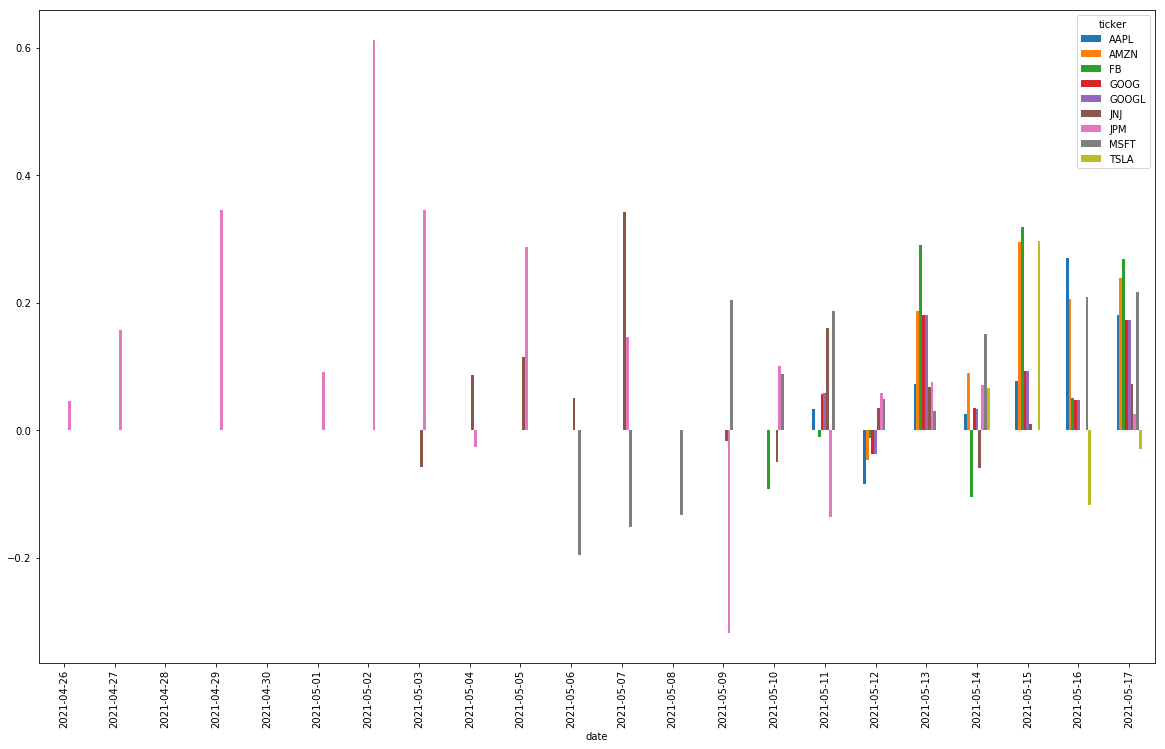

<Figure size 720x360 with 0 Axes>

In [35]:
mean_df = mean_df.xs('compound', axis="columns").transpose()
mean_df.plot(kind='bar', figsize=(20, 12))
fig = plt.figure(figsize=(10,5))
fig.savefig('line plot.jpg', bbox_inches='tight', dpi=150)


In [36]:
df2 =(df.groupby(['ticker', 'date']).mean())
df2

compound
ticker date                
AAPL   2021-05-11  0.032942
       2021-05-12 -0.084747
       2021-05-13  0.072417
       2021-05-14  0.024795
       2021-05-15  0.076360
       2021-05-16  0.270800
       2021-05-17  0.180104
AMZN   2021-05-12 -0.047143
       2021-05-13  0.186587
       2021-05-14  0.090011
       2021-05-15  0.295575
       2021-05-16  0.205400
       2021-05-17  0.238043
FB     2021-05-10 -0.093100
       2021-05-11 -0.011195
       2021-05-12 -0.011976
       2021-05-13  0.290744
       2021-05-14 -0.105620
       2021-05-15  0.318450
       2021-05-16  0.050500
       2021-05-17  0.269175
GOOG   2021-05-11  0.056492
       2021-05-12 -0.037313
       2021-05-13  0.180961
       2021-05-14  0.034506
       2021-05-15  0.092240
       2021-05-16  0.047800
       2021-05-17  0.173556
GOOGL  2021-05-11  0.058846
       2021-05-12 -0.037313
...                     ...
JPM    2021-05-02  0.612400
       2021-05-03  0.345400
       2021-05-04 -0.026650
       2021-05-05  0.286838
       2021-05-06  0.000000
       2021-05-07  0.146314
       2021-05-09 -0.318200
       2021-05-10  0.101371
       2021-05-11 -0.136678
       2021-05-12  0.058480
       2021-05-13  0.076218
       2021-05-14  0.070557
       2021-05-15  0.000000
       2021-05-16  0.000000
       2021-05-17  0.025733
MSFT   2021-05-06 -0.196667
       2021-05-07 -0.151243
       2021-05-08 -0.132600
       2021-05-09  0.204133
       2021-05-10  0.088600
       2021-05-11  0.187483
       2021-05-12  0.048920
       2021-05-13  0.029708
       2021-05-14  0.150083
       2021-05-16  0.208300
       2021-05-17  0.217188
TSLA   2021-05-14  0.065794
       2021-05-15  0.296750
       2021-05-16 -0.117857
       2021-05-17 -0.029884

[84 rows x 1 columns]

In [37]:
def score(row):
    if row['compound'] > 0.05:
        signal = 1
    elif row['compound'] < -0.05:
        signal = -1
    else:
        signal = 0     
    return signal


df2['Signal'] = df2.apply(score, axis=1)
df2['Action'] = ["Buy" if x == 1 else "Sell" if x== -1 else "Hold" for x in df2['Signal']] 
df2.head()

compound  Signal Action
ticker date                               
AAPL   2021-05-11  0.032942       0   Hold
       2021-05-12 -0.084747      -1   Sell
       2021-05-13  0.072417       1    Buy
       2021-05-14  0.024795       0   Hold
       2021-05-15  0.076360       1    Buy